<a href="https://colab.research.google.com/github/sorinnicumarian/stock_prediction_linear_regression/blob/main/Medium_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inspired from https://medium.com/@varun.tyagi83/stock-price-prediction-with-machine-learning-02c9cce35aab

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


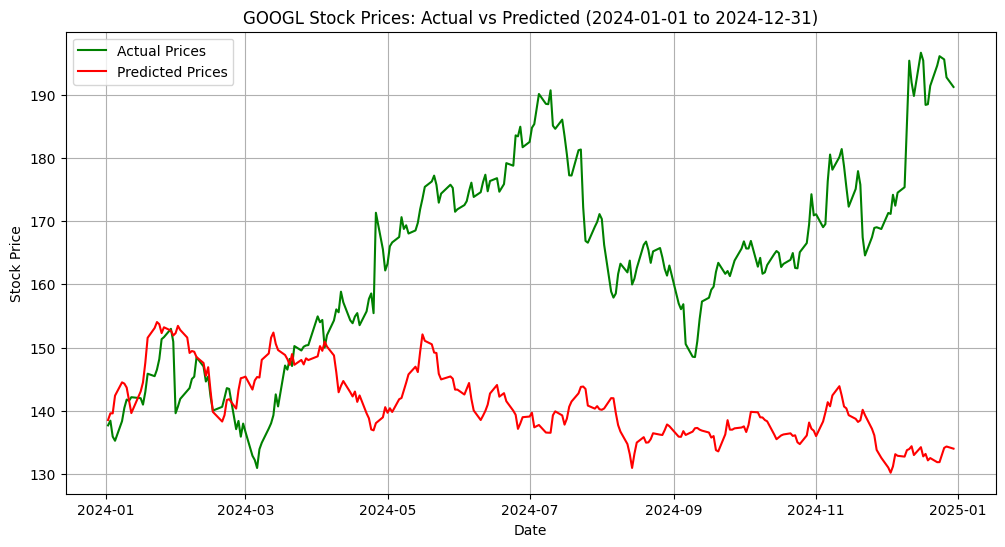

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import matplotlib.pyplot as plt

def main():
    ticker = 'GOOGL'
    start_date = '2000-01-01'
    train_end_date = '2024-01-01'
    predict_start_date = '2024-01-01'
    predict_end_date = '2024-12-31'

    stock_data = download_stock_data(ticker, start_date, train_end_date)
    sequence_length = 365
    data_sequences = preprocess_data(stock_data, sequence_length)

    X_train, y_train = extract_features_and_targets(data_sequences)
    model = train_model(X_train, y_train)

    prediction_data = download_stock_data(ticker, predict_start_date, predict_end_date)
    predicted_prices = predict_stock_prices(model, X_train[-1], len(prediction_data), sequence_length)

    plot_actual_vs_predicted(prediction_data, predicted_prices, ticker, predict_start_date, predict_end_date)

def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def preprocess_data(data, sequence_length):
    sequences = [
        (data.iloc[i:i + sequence_length].values.flatten(), data.iloc[i + sequence_length])
        for i in range(len(data) - sequence_length)
    ]
    return sequences

def split_data(data, test_size=0.2):
    return train_test_split(data, test_size=test_size, shuffle=False)

def extract_features_and_targets(data_sequences):
    X = np.array([item[0] for item in data_sequences])
    y = np.array([item[1] for item in data_sequences])
    return X, y

def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def predict_stock_prices(model, last_sequence, n_days, sequence_length):
    predictions = []
    current_sequence = np.array(last_sequence)

    for _ in range(n_days):
        predicted_price = model.predict(current_sequence.reshape(1, -1)).item()
        predictions.append(predicted_price)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = predicted_price

    return predictions

def plot_actual_vs_predicted(actual_data, predicted_data, ticker, start_date, end_date):
    plt.figure(figsize=(12, 6))
    plt.plot(actual_data.index, actual_data.values, label='Actual Prices', color='green')
    plt.plot(actual_data.index, predicted_data, label='Predicted Prices', color='red')
    plt.title(f'{ticker} Stock Prices: Actual vs Predicted ({start_date} to {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()